In [25]:
import lightkurve as lk
import pywhiten
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# star = 'HD47129'
# star = 'HD20203'
star = 'HD28548'
lk_search = lk.search_lightcurve(star, mission="TESS")
lk_search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 05,2018,SPOC,120,71134596,0.0
1,TESS Sector 05,2018,TESS-SPOC,1800,71134596,0.0
2,TESS Sector 05,2018,QLP,1800,71134596,0.0
3,TESS Sector 05,2018,TASOC,120,71134596,0.0
4,TESS Sector 05,2018,CDIPS,1800,71134596,0.0
5,TESS Sector 05,2018,GSFC-ELEANOR-LITE,1800,71134596,0.0
6,TESS Sector 05,2018,TASOC,1800,71134596,0.0
7,TESS Sector 05,2018,TASOC,1800,71134596,0.0
8,TESS Sector 05,2018,TGLC,1800,71134596,0.0


In [64]:
lc = lk_search[0].download().remove_nans().remove_outliers()
lc.to_csv(f'stars/{star}_lk.csv', overwrite=True)

In [65]:
t, m, err = lc.time.value, lc.flux.value, lc.flux_err.value

In [66]:
t, m, err = np.loadtxt(f'stars/{star}_lk.csv', delimiter=',', skiprows=1, unpack=True, usecols=(0,1,2))

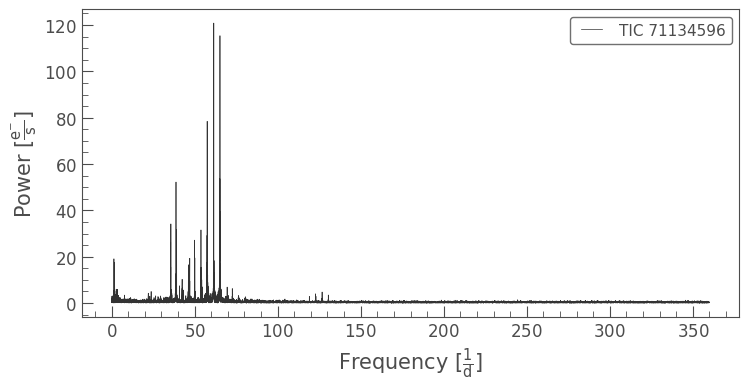

In [67]:
lc.to_periodogram().plot()
# plt.xlim(0, 24)
plt.show()

In [62]:
len(t), len(m), len(err)

(17719, 17719, 17719)

In [146]:
# pywhitener = pywhiten.PyWhitener(time=list(t), data=list(m), cfg_file='config.toml')
config_dict = {'periodograms' : {'upper_limit':80}, 
               'autopw' : {'peak_selection_method' : 'slf', 'new_lc_generation_method' : 'mf',
                           'peak_selection_highest_override' : 8, 'peak_selection_cutoff_sig' : 3.0,
                           'cutoff_iteration' : 50, 'autopw.bounds' : {'phase_fit_rejection_criterion' : 0.1,
                                                                       'freq_lower_coeff' : 0.8,
                                                                       'freq_upper_coeff' : 1.2,
                                                                       'amp_lower_coeff' : 0.8,
                                                                       'amp_upper_coeff' : 1.2,
                                                                       'phase_lower' : -100,
                                                                       'phase_upper' : 100}}}
pywhitener = pywhiten.PyWhitener(time=list(t), data=list(m), cfg=config_dict)

In [147]:
pywhitener.auto()
# for i in range(30):
#     pywhitener.it_pw()

[pywhiten] ITERATION 1
[pywhiten] Identified single frequency model:
	f0: f = 61.51344 | a = 121.593 | phi = 0.385
	MF ZP: 0.0573504440330799
[pywhiten] Completed optimization of current complete variability model:
	f0: f = 61.51344 | a = 121.593 | phi = 0.385
[pywhiten] ITERATION 2
[pywhiten] Identified single frequency model:
	f1: f = 65.24588 | a = 116.233 | phi = -1.085
	MF ZP: 0.05257816086114056
[pywhiten] Completed optimization of current complete variability model:
	f0: f = 61.51344 | a = 121.929 | phi = 0.385
	f1: f = 65.24588 | a = 116.235 | phi = -1.086
[pywhiten] ITERATION 3
[pywhiten] Identified single frequency model:
	f2: f = 57.55519 | a = 79.107 | phi = -1.212
	MF ZP: 0.04768828431715648
[pywhiten] Completed optimization of current complete variability model:
	f0: f = 61.51344 | a = 122.034 | phi = 0.385
	f1: f = 65.24588 | a = 116.419 | phi = -1.079
	f2: f = 57.55519 | a = 79.109 | phi = -1.211
[pywhiten] ITERATION 4
[pywhiten] Identified single frequency model:
	f3: 

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [148]:
pywhitener.post_pw()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.